In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ioutrack import ByteTrack

In [3]:
import matplotlib.pyplot as plt

In [4]:
from demo_utils import load_csv, get_annotated_frame, run_tracker, write_video

In [5]:
MOT_TASK_FOLDER = "/mnt/c/Users/kling/Downloads/MOT20/train/MOT20-03/"
FPS = 25
OUT_PATH = "/mnt/c/Users/kling/bytetrack_vid.mp4"

In [6]:
dets = load_csv(MOT_TASK_FOLDER, "det")

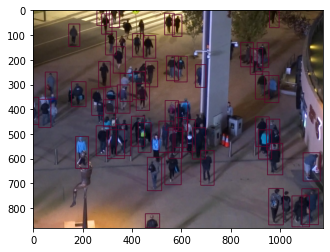

In [7]:
plt.imshow(get_annotated_frame(dets.query("frame_id == 100")))

In [8]:
rust_tracker = ByteTrack(min_hits=2, max_age=FPS, iou_threshold=0.3, init_tracker_min_score=0.7, high_score_threshold=0.5, low_score_threshold=0.2)

tracks = run_tracker(rust_tracker, dets)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2405/2405 [00:02<00:00, 856.64it/s]


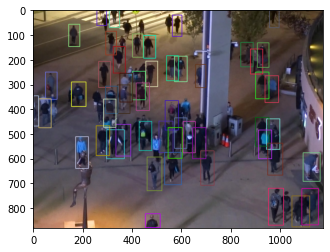

In [9]:
plt.imshow(get_annotated_frame(tracks.query("frame_id == 100")))

In [10]:
write_video(OUT_PATH, FPS, (
  get_annotated_frame(tracks.loc[i:i]) for i in range(int(tracks.index.min()), int(tracks.index.max() + 1))
))